### All imports

In [1]:
from torchvision import transforms
from torchvision import datasets
# from google.colab import drive
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler #randomly shuffles the dataset
import matplotlib.pyplot as plt
from datetime import datetime
import torch.nn as nn
import torch
from torchvision import models

### All the transform functions

In [2]:
transform2 = transforms.Compose([#vgg16
    transforms.Resize((299, 299)),
    transforms.ToTensor(), # ToTensor image ko convert karta hai pixelated values ye pytorch tensor me ie [0,1]
    transforms.Normalize(  #Normalize scale karta hai image ko [-1,1] me
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

transform3 = transforms.Compose([          #resnet
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]
                         )
])

transform4 = transforms.Compose([          #mobilenetv2
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

### Importing the dataset

In [3]:

# For google colab 

# drive.mount('/content/drive')
# dataset_vgg=datasets.ImageFolder("/content/drive/MyDrive/patta /archive/MepcoTropicLeaf-V1/Database", transform=transform2)
# dataset_mobilenet=datasets.ImageFolder("/content/drive/MyDrive/patta /archive/MepcoTropicLeaf-V1/Database", transform=transform4)
# dataset_resnet=datasets.ImageFolder("/content/drive/MyDrive/patta /archive/MepcoTropicLeaf-V1/Database", transform=transform3)


# On laptop 
# dataset_vgg=datasets.ImageFolder("C:\\Users\\hardi\\Downloads\\archive\\MepcoTropicLeaf-V1\\Database", transform=transform2)
# dataset_mobilenet=datasets.ImageFolder("C:\\Users\\hardi\\Downloads\\archive\\MepcoTropicLeaf-V1\\Database", transform=transform4)
# dataset_resnet=datasets.ImageFolder("C:\\Users\\hardi\\Downloads\\archive\\MepcoTropicLeaf-V1\\Database", transform=transform3)

#for kaggle 

dataset_vgg=datasets.ImageFolder("/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database", transform=transform2)
dataset_mobilenet=datasets.ImageFolder("/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database", transform=transform4)
dataset_resnet=datasets.ImageFolder("/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database", transform=transform3)


print(dataset_vgg)
print(dataset_mobilenet)
print(dataset_resnet)

Dataset ImageFolder
    Number of datapoints: 3777
    Root location: /kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database
    StandardTransform
Transform: Compose(
               Resize(size=(299, 299), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )
Dataset ImageFolder
    Number of datapoints: 3777
    Root location: /kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset ImageFolder
    Number of datapoints: 3777
    Root location: /kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database
    StandardTransform
Transform: Compose(
               Resize(size=(299, 299), interpolation=bilinear, max_siz

### Splitting the dataset

In [5]:

indices=list(range(len(dataset_vgg))) # dataset ko numerate karne ke liye
split=int(np.floor(0.70*len(dataset_vgg)))
validation=int(np.floor(0.60*split))

# agar tmre pass 100 samples hai
# toh split=70(ie 70% of the dataset)-> ee use hoga training and validation ke liye; remaining (30)30% used hoga as test set
# tb validation=42 (ie 60% of the dataset)-> ee use hoga for training ke liye; remaining (28)40% used hoga as Validation set
# toh phir training= 42%; validation= 28%; test=30%

print(f"length of train size : {validation}")
print(f"length of validation size : {split-validation}")
print(f"length of test size : {len(dataset_vgg)-split}")

np.random.shuffle(indices) # dataset me randomness laane ke liye

# ab actual splitting
train_indices, validation_indices, test_indices = (
    indices[:validation], # [:5]->0,1,2,3,4
    indices[validation:split],# [1:3]->1,2
    indices[split:],# [2:]-> 2,3,4,5,........
)

train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)
test_sampler = SubsetRandomSampler(test_indices)

# print(list(train_indices))
# print(list(validation_indices))
# print(list(test_indices))

# print(list(train_sampler))
# print(list(validation_sampler))
# print(list(test_sampler))


length of train size : 1585
length of validation size : 1058
length of test size : 1134


### No. of unique features

In [6]:
targets_size = len(dataset_vgg.class_to_idx)# finding the total unique classes and storing it
print(targets_size)
print(list(dataset_vgg.class_to_idx.keys()))
num_classes_list = list(dataset_vgg.class_to_idx.values())# now numerating them
print(num_classes_list)

50
['Asthma Plant.zip', 'Avaram.zip', 'Balloon vine.zip', 'Bellyache bush (Green).zip', 'Benghal dayflower.zip', 'Big Caltrops.zip', 'Black-Honey Shrub.zip', 'Bristly Wild Grape.zip', 'Butterfly Pea.zip', 'Cape Gooseberry.zip', 'Common Wireweed.zip', 'Country Mallow.zip', 'Crown flower.zip', 'Green Chireta.zip', 'Holy Basil.zip', 'Indian CopperLeaf.zip', 'Indian Jujube.zip', 'Indian Sarsaparilla.zip', 'Indian Stinging Nettle.zip', 'Indian Thornapple.zip', 'Indian wormwood.zip', 'Ivy Gourd.zip', 'Kokilaksha.zip', 'Land Caltrops (Bindii).zip', 'Madagascar Periwinkle.zip', 'Madras Pea Pumpkin.zip', 'Malabar Catmint.zip', 'Mexican Mint.zip', 'Mexican Prickly Poppy.zip', 'Mountain Knotgrass.zip', 'Nalta Jute.zip', 'Night blooming Cereus.zip', 'Panicled Foldwing.zip', 'Prickly Chaff Flower.zip', 'Punarnava.zip', 'Purple Fruited Pea Eggplant.zip', 'Purple Tephrosia.zip', 'Rosary Pea.zip', 'Shaggy button weed.zip', 'Small Water Clover.zip', 'Spiderwisp.zip', 'Square Stalked Vine.zip', 'Stinkin

### Loading the models 

In [7]:

model = models.vgg16(pretrained=True)#if pretrained=false, tb saare layers ko hmlog ko individually train karna hoga
model2=models.mobilenet_v2(pretrained=True)
model3=models.resnet18(pretrained=True)

# model
# model2
# model3

for params in model3.parameters():
   params.requires_grad = True
# resnet18 ke saare parameters ko trainable bana rhe hai; resnet ka feature extraction acha kaam karra hai isliye use krre plus accuracy bhi increase ho rha
# mobilenet aur vgg complex models hai (more param and layers), agar isko(function) use kare toh model overfit ho sakta

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 231MB/s]  
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future

### Extracting feature size

In [8]:
n_features = model.classifier[0].in_features #vgg16; number of input features in the first fully connected layer
print(1, n_features)
n_features = model2.classifier[1].in_features #mobilenet; number of input features in the first fully connected layer
print(2, n_features)
n_features = model3.conv1.in_channels #resnet18; number of input features in the first convolutional layer
print(3, n_features)

# ee kyu krre?-> taaki pata chale ki input and output features pata chale
# Last layer change karke model ko apne data pe train karre hai.
# Pehle wali layers ko rakhne ka fayda->
# Ye layers already trained hota h aur feature extraction achha kar leta h.
# Sirf last layer train karne se kam computation time lagega.
# Kam data hone par bhi model achha perform karega, kyunki pehle se trained layers use ho rahi hain.
# Isko *Transfer Learning kehte hain

1 25088
2 1280
3 3


### Overriding the calculations to GPU if available

In [14]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device) #checking if GPU is available
model.to(device)
model2.to(device)
model3.to(device)#shifting the model to 'device' for computing

#summarizing the layers of all models; helps validate the model before training, avoiding errors later.

# from torchsummary import summary
# print(1, summary(model, (3, 224, 224)))
# print(2, summary(model2, (3, 224, 224)))
# print(3, summary(model3, (3, 224, 224)))

#output shape [-1,c,h,w]
#c->no of filters/ channels
#h,w-> feature map size after operation

cuda


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:

criterion = nn.CrossEntropyLoss()  # this include softmax + cross entropy loss
# calculates the loss during training, which will be later used by backpropagation to imporove the models accuracy
optimizer_vgg = torch.optim.Adam(model.parameters())
optimizer_mobilenet= torch.optim.Adam(model2.parameters())
optimizer_resnet = torch.optim.Adam(model3.parameters())
#adam optimiser is used to optimise the models parameters(weights of the model) to minimise the loss and hence increase the accuracy

### Gradient Descent 

In [10]:
data_transforms = {
    'train_loader': transforms.Compose([
        transforms.RandomAffine(degrees=10, translate=(0.05, 0.05), shear=5) , # image ko randomly rotate karne ke liye
        transforms.ColorJitter(hue=0.05, saturation=0.05), # naam jo suggest karta hai
        transforms.RandomHorizontalFlip(), #randomly image ko flip kar deta hai 50% probability saath
        transforms.Grayscale(num_output_channels=1), #image is converted to black and white when =1; when=3 it is converted to fake RGB
        transforms.RandomApply([transforms.GaussianBlur(kernel_size=7)], p=0.2), # randomly applies Gaussian blur with probability=20%;
                                                                                 # kernel size=7->moderate blur; 3->light blur; 15->heavy blur
        transforms.ToTensor(),#image ko convert karta hai pixelated values ye pytorch tensor me ie [0,1]
        transforms.Normalize((0.5,), (0.5,)),#pixelated values from [0,1] to [-1,1]
    ]),
    'validation_loader': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ])
}

In [11]:
batch_size = 64
#balances training speed and memory usage, as smaller trains slow and require less gpu, while larger batches train faster but require more GPU memory.
#vgg
train_loader_vgg = torch.utils.data.DataLoader(dataset_vgg, batch_size=batch_size, sampler=train_sampler)
test_loader_vgg = torch.utils.data.DataLoader(dataset_vgg, batch_size=batch_size, sampler=test_sampler)
validation_loader_vgg = torch.utils.data.DataLoader(dataset_vgg, batch_size=batch_size, sampler=validation_sampler)

#mobilenet
train_loader_mobilenet = torch.utils.data.DataLoader(dataset_mobilenet, batch_size=batch_size, sampler=train_sampler)
test_loader_mobilenet = torch.utils.data.DataLoader(dataset_mobilenet, batch_size=batch_size, sampler=test_sampler)
validation_loader_mobilenet = torch.utils.data.DataLoader(dataset_mobilenet, batch_size=batch_size, sampler=validation_sampler)

#resnet
train_loader_resnet = torch.utils.data.DataLoader(dataset_resnet, batch_size=batch_size, sampler=train_sampler)
test_loader_resnet = torch.utils.data.DataLoader(dataset_resnet, batch_size=batch_size, sampler=test_sampler)
validation_loader_resnet = torch.utils.data.DataLoader(dataset_resnet, batch_size=batch_size, sampler=validation_sampler)

In [41]:
def batch_gd(model, criterion, train_loader, test_laoder, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for e in range(epochs):

        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:

            inputs, targets = inputs.to(device), targets.to(device)
            optimizer_vgg.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            train_loss.append(loss.item())  # torch to numpy world
            loss.backward()
            optimizer_vgg.step()

        train_loss = np.mean(train_loss)

        validation_loss = []

        for inputs, targets in validation_loader_vgg:

            inputs, targets = inputs.to(device), targets.to(device)

            output = model(inputs)

            loss = criterion(output, targets)

            validation_loss.append(loss.item())  # torch to numpy world

        validation_loss = np.mean(validation_loss)

        train_losses[e] = train_loss

        dt = datetime.now() - t0

        print(f"Epoch : {e+1}/{epochs} Train_loss:{train_loss:.3f} Duration:{dt}")

    return train_losses

In [42]:
train_losses_vgg = batch_gd(model, criterion, train_loader_vgg, validation_loader_vgg, 10)

OutOfMemoryError: CUDA out of memory. Tried to allocate 694.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 110.12 MiB is free. Process 2513 has 14.63 GiB memory in use. Of the allocated memory 13.88 GiB is allocated by PyTorch, and 632.62 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

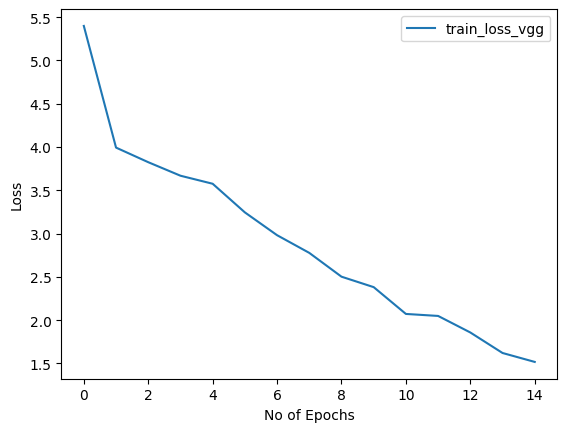

In [17]:
plt.plot(train_losses_vgg , label = 'train_loss_vgg')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()#validation loss ke liye 

In [18]:
def accuracy(loader, model):
    n_correct = 0
    n_total = 0
    model.cuda()  # Move the model to GPU

    for inputs, targets in loader:
        inputs, targets = inputs.cuda(), targets.cuda()

        outputs = model(inputs)  
        _, predictions = torch.max(outputs, 1)

        n_correct += (predictions == targets).sum().item()
        n_total += targets.shape[0]

    acc = n_correct / n_total
    return acc

In [20]:
print("VGG")
train_acc = accuracy(train_loader_vgg,model)
test_acc = accuracy(test_loader,model)
validation_acc = accuracy(validation_loader,model)
print(
    f"Train Accuracy : {train_acc}\nTest Accuracy : {test_acc}\nValidation Accuracy : {validation_acc}"
)

VGG


OutOfMemoryError: CUDA out of memory. Tried to allocate 694.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 114.12 MiB is free. Process 2513 has 14.63 GiB memory in use. Of the allocated memory 14.32 GiB is allocated by PyTorch, and 176.13 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)